Import the necessary libraries.

In [10]:
from transformers import BertModel, BertConfig, BertTokenizer
import os
from create_input_lists import create_input_lists_from_csv, lemmatize
import matplotlib.pyplot as plt

Create the BERT tokenizer.

In [11]:
model_path = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_path)

Read the text data from file and process it.

In [12]:
input1 = 'assessments.csv'
input2 = 'paragraphs.csv'

inputFolder = './OneDrive-2020-12-04/intro_bio (with periods)_labelled' # local (temporary)
# curr_dir = os.path.dirname(os.path.realpath(__file__))
# inputFolder = os.path.join(curr_dir, inputFolder)

input1_path = os.path.join(inputFolder, input1)
input2_path = os.path.join(inputFolder, input2)

text_ids1, lemmatized_texts1, original_texts1, text_ids2, lemmatized_texts2, original_texts2 = create_input_lists_from_csv(input1_path, input2_path)

In [13]:
with open('raw-text-for-bert.txt', 'w') as output:
    for text in original_texts1:
        output.write(text+'\n')
    for text in original_texts2:
        output.write(text+'\n')
    

Tokenize the lemmatized texts (assessments and paragraphs).

In [5]:
assessment_lengths = []
for assessment in lemmatized_texts1:
    tokens = tokenizer(assessment)
    assessment_lengths.append(len(tokens['input_ids']))
    
paragraph_lengths = []
for paragraph in lemmatized_texts2:
    tokens = tokenizer(paragraph)
    paragraph_lengths.append(len(tokens['input_ids']))

Output and graph the statistics for the lengths of the assessments and paragraphs.

In [11]:
min_assessment_length = min(assessment_lengths)
max_assessment_length = max(assessment_lengths)
mean_assessment_length = 0 if len(assessment_lengths) == 0 else sum(assessment_lengths)/len(assessment_lengths)

print('Minimum Length of an Assessment:', min_assessment_length)
print('Maximum Length of an Assessment:', max_assessment_length)
print(f'Mean Length of an Assessment: {(mean_assessment_length):.2f}\n')

min_paragraph_length = min(paragraph_lengths)
max_paragraph_length = max(paragraph_lengths)
mean_paragraph_length = 0 if len(paragraph_lengths) == 0 else sum(paragraph_lengths)/len(paragraph_lengths)

print('Minimum Length of a Paragraph:', min_paragraph_length)
print('Maximum Length of a Paragraph:', max_paragraph_length)
print(f'Mean Length of a Paragraph: {(mean_paragraph_length):.2f}')

Minimum Length of an Assessment: 4
Maximum Length of an Assessment: 147
Mean Length of an Assessment: 30.88

Minimum Length of a Paragraph: 3
Maximum Length of a Paragraph: 420
Mean Length of a Paragraph: 37.36


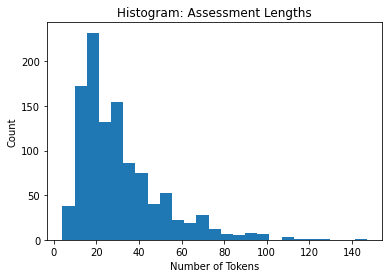

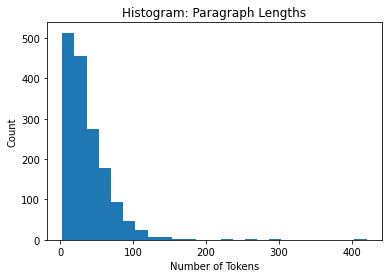

In [9]:
plt.hist(assessment_lengths, bins = 25)
plt.title('Histogram: Assessment Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.show()

plt.hist(paragraph_lengths, bins = 25)
plt.title('Histogram: Paragraph Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.show()